# Processes & Materials

In [63]:
import pandas as pd 
import numpy as np 

### Helper Functions

In [64]:
def downcast_dtypes(df:pd.DataFrame) -> pd.DataFrame:
    """Downcasts the data types of the dataframe to the lowest type required."""
    # get the dtypes of the dataframe
    for col in df.select_dtypes('number'):
        df[col] = pd.to_numeric(df[col], downcast='integer')
        if df[col].dtype == 'float':
            df[col] = pd.to_numeric(df[col], downcast='float')
    return df

## EDA

### Data Loading & Cleaning

In [74]:
## path to file 
FILE = 'data.csv'
## read the file
data = pd.read_csv(FILE)
## transpose, reset index and drop the index
data = data.T.reset_index().drop("index", axis=1).set_index(0).T

## clean the data 

## the column Cost/Energy: replace ? with 0 
data['Cost/Energy…?'] = data['Cost/Energy…?'].replace('?', 0)
## rename the column 'Cost/Energy…?' to 'Energy'
data.rename(columns={'Cost/Energy…?': 'Energy'}, inplace=True)
## get all columns except Energy and Processes
cols = [col for col in data.columns if col not in ['Energy', 'Processes']]
## convert the columns to numeric 
data[cols] = data[cols].apply(pd.to_numeric)


## some feedback from the data 
print(f"The data has {data.shape[0]} rows and {data.shape[1]} columns.")
## show the dtypes of the data
print("The data has the following dtypes:")
print(data.dtypes.value_counts()) ## the dtypes occupy a lot of memory 
usage_now = data.memory_usage(deep=True).sum()
print(f"The data occupies {data.memory_usage().sum()/1e9} GB of memory.\n")

## downcast the dtypes to the lowest type required
data = downcast_dtypes(data)
print(f"The data has the following dtypes after downcasting:")
print(data.dtypes.value_counts())
## show the amount of memory the data occupies
usage_after = data.memory_usage(deep=True).sum()
print(f"The data occupies {data.memory_usage().sum()/1e9} GB of memory.")
## show the percentage of reduced memory usage of the dataframe
print(f"\nThe data occupies {(usage_now-usage_after)/usage_now*100:.2f}% less memory than before.")
## save the dataframe to a csv file
data.to_csv("./low_mem_data.csv")

The data has 30 rows and 22 columns.
The data has the following dtypes:
int64     21
object     1
dtype: int64
The data occupies 5.52e-06 GB of memory.

The data has the following dtypes after downcasting:
int8      21
object     1
dtype: int64
The data occupies 1.11e-06 GB of memory.

The data occupies 55.26% less memory than before.


In [75]:
data.head()

,Processes,M-001,M-002,M-003,M-004,M-005,M-006,M-007,M-008,M-009,...,M-012,M-013,M-014,M-015,M-016,M-017,M-018,M-019,M-020,Energy
1,P-001,-73,0,59,0,48,0,0,0,0,...,-60,0,0,-26,0,0,-9,-15,0,0
2,P-002,0,0,0,0,73,0,0,11,0,...,0,36,-33,33,-82,64,0,-38,-92,0
3,P-003,0,0,0,58,26,0,0,92,43,...,-42,34,-4,5,0,0,0,0,0,0
4,P-004,0,71,-28,0,-76,0,4,-12,0,...,0,-21,0,0,-28,0,18,0,0,0
5,P-005,0,-2,0,-71,37,0,0,19,16,...,98,-7,0,0,0,0,-91,22,4,0


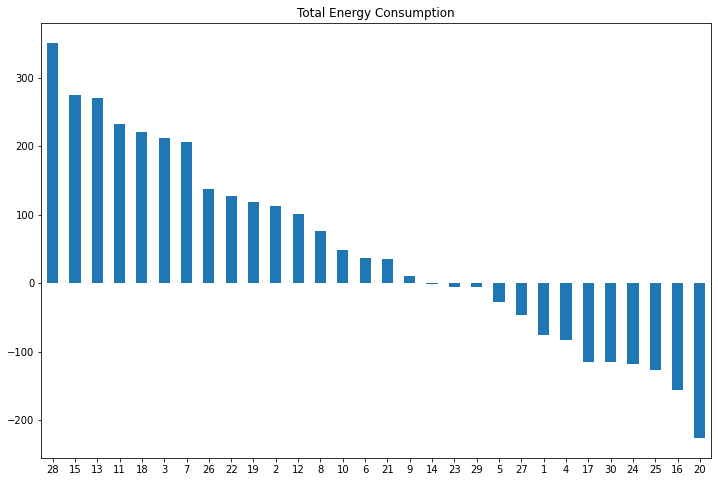

In [82]:
import matplotlib.pyplot as plt
data.sum(axis=1).sort_values(ascending=False).plot(kind='bar',
                                                   rot=0,
                                                   figsize=(12,8),
                                                   title='Total Energy Consumption')
plt.show()

In [94]:
import plotly.express as px

## create a plotly figure with the data
sort_data = data.sum(axis=1).sort_values(ascending=False).reset_index().drop('index', axis=1)

fig = px.bar(sort_data)
fig.update_layout(showlegend=False)
fig.show()